<a href="https://colab.research.google.com/github/royarkaofficial/DataOps-Lab8-31th-Dec-2024-Adv-Data-Testing-on-CSV/blob/main/Copy_of_Lab8_Advanced_data_testing_on_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective
Participants will load a CSV file, perform data validation, clean the dataset, and analyze it for common issues like missing values, outliers, inconsistencies, and duplicates. They will also visualize the dataset to identify patterns and anomalies.

Prerequisites
Basic knowledge of Python and pandas.
Familiarity with CSV file handling.
Dataset: Use a dataset with multiple columns (e.g., sales, customer demographics, or e-commerce data) containing missing values, outliers, and inconsistencies.

**Steps for the Lab**
Step 1: Load the Dataset
Download or provide a CSV dataset (e.g., "ecommerce_data.csv").

The dataset should contain columns such as CustomerID, Age, Gender, AnnualIncome, SpendingScore, etc., with some missing or inconsistent entries.

In [ ]:
import pandas as pd

#load the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/ecommerce_ip_data (1).csv')

#Show the first few rows of the dataset
print(df.head())

   CustomerID   Age   Gender  AnnualIncome  SpendingScore
0          82  48.0   Female       47350.0             88
1         143  31.0  Unknown       70517.0             90
2          32  44.0  Unknown       85417.0              1
3          30  42.0        F      146131.0             78
4         119  59.0   Female       57841.0             27


Step 2: Understand the Dataset
Explore the dataset by printing out summary statistics and getting a sense of the data.

In [ ]:
#summary statistics for numerical columns
print(df.describe())
print("\n--------------\n")

#Check for the data types and non-null counts in each columns
print(df.info())

       CustomerID         Age   AnnualIncome  SpendingScore
count   155.00000  150.000000     150.000000     155.000000
mean     75.43871   41.173333   89173.053333      56.754839
std      43.12005   16.506963   45188.699683      33.036843
min       1.00000   -1.000000   20728.000000       1.000000
25%      38.50000   28.250000   55853.250000      27.000000
50%      76.00000   41.000000   85463.500000      55.000000
75%     112.50000   54.750000  115265.750000      82.500000
max     150.00000   69.000000  262292.000000     110.000000

--------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     155 non-null    int64  
 1   Age            150 non-null    float64
 2   Gender         155 non-null    object 
 3   AnnualIncome   150 non-null    float64
 4   SpendingScore  155 non-null    int64  
dtypes: float64(2), int64(2), o

Step 3: Identify and Handle Missing Values
Detect missing values in the dataset using pandas

In [ ]:
#Check the missing values
missing_values = df.isnull().sum()
print(missing_values)

CustomerID       0
Age              5
Gender           0
AnnualIncome     5
SpendingScore    0
dtype: int64


Handle missing values by:

Imputing: Filling missing values using methods such as mean, median, or mode.

Dropping: Removing rows/columns with missing values if appropriate.

In [ ]:
#Impute the missing Age values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

#Drop the rows where Annual income is missing
df.dropna(subset=['AnnualIncome'], inplace=True)

<ipython-input-5-1a0ee35a3c33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


Step 4: Check for Duplicates
Find and remove duplicate records in the dataset.

In [ ]:
#check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#remove duplicates
df.drop_duplicates(inplace=True)

Number of duplicate rows: 5


Step 5: Identify and Handle Outliers
Detect outliers using statistical techniques such as the IQR (Interquartile Range) method or z-scores.**IQR**

**IQR**

In [ ]:
#Calculate IRQ for Annual Income

Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the outliers in AnnualIncome
outliers = df[(df['AnnualIncome'] < lower_bound) | (df['AnnualIncome'] > upper_bound)]

#Print the outliers
print(outliers)

     CustomerID   Age   Gender  AnnualIncome  SpendingScore
13           76  43.0   Female      208415.0             51
73           26  50.0        M      261813.0             74
87          126  29.0  Unknown      223833.0             21
121         101  62.0    Other      262292.0            110
128          51  31.0        M      227712.0            110


Handle outliers by either:

Removing them from the dataset.
Capping them within a reasonable range.
Treating them as separate cases for further analysis.

In [ ]:
#Remove the outliers from the dataset
df = df[(df['AnnualIncome'] >= lower_bound) & (df['AnnualIncome'] <= upper_bound)]
print("Removing the outliers")
df

Removing the outliers


,CustomerID,Age,Gender,AnnualIncome,SpendingScore
0,82,48.0,Female,47350.0,88
1,143,31.0,Unknown,70517.0,90
2,32,44.0,Unknown,85417.0,1
3,30,42.0,F,146131.0,78
4,119,59.0,Female,57841.0,27
...,...,...,...,...,...
150,72,59.0,Male,40764.0,82
151,107,18.0,F,112920.0,80
152,15,57.0,Unknown,55247.0,92
153,93,64.0,M,127112.0,74


Step 6: Check for Inconsistencies
Detect inconsistencies in the dataset. For example:

Gender column may have inconsistent or invalid entries.
Age column may have invalid values like negative numbers or unrealistic ages.

In [ ]:
# Check for inconsistencies in the Gender column
valid_genders = ['Male', 'Female']
inconsistent_gender = df[~df['Gender'].isin(valid_genders)]
print(inconsistent_gender)
print("\n--------------------------------------------------------------\n")
print(df)
# Fix inconsistent gender values
df['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
print("\n--------------------------------------------------------------\n")
print(df)

print("\n--------------------------------------------------------------\n")
# Check for invalid Age values (e.g., negative or too high)
invalid_ages = df[(df['Age'] < 0) | (df['Age'] > 100)]
print(invalid_ages)
print("\n--------------------------------------------------------------\n")

# Remove rows with invalid ages
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

     CustomerID        Age   Gender  AnnualIncome  SpendingScore
1           143  31.000000  Unknown       70517.0             90
2            32  44.000000  Unknown       85417.0              1
3            30  42.000000        F      146131.0             78
5            61  -1.000000    Other      121042.0            110
7           148  31.000000  Unknown       99459.0             47
..          ...        ...      ...           ...            ...
149          21  41.173333    Other       79101.0            110
151         107  18.000000        F      112920.0             80
152          15  57.000000  Unknown       55247.0             92
153          93  64.000000        M      127112.0             74
154         103  42.000000        F      125891.0             43

[83 rows x 5 columns]

--------------------------------------------------------------

     CustomerID   Age   Gender  AnnualIncome  SpendingScore
0            82  48.0   Female       47350.0             88
1           

<ipython-input-9-41e7a533b655>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
<ipython-input-9-41e7a533b655>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)


Step 7: Visualize Data for Better Understanding
Visualize data to identify patterns, relationships, and potential anomalies.

Use visualizations like histograms, box plots, or scatter plots to inspect the distribution of numerical columns.

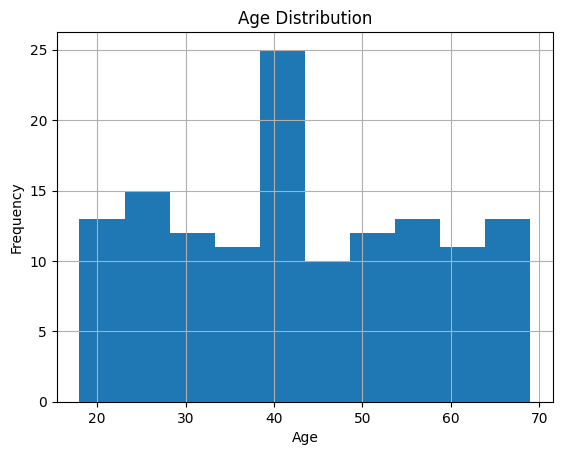

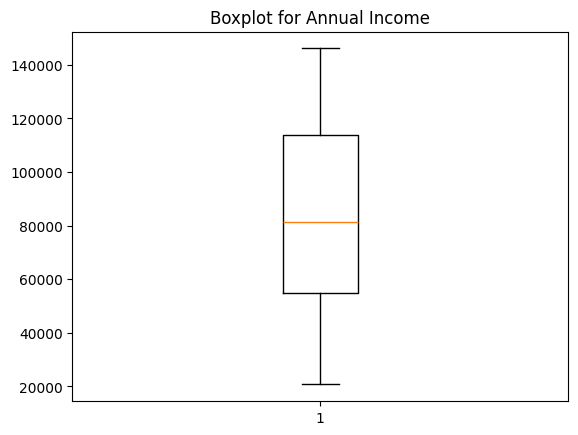

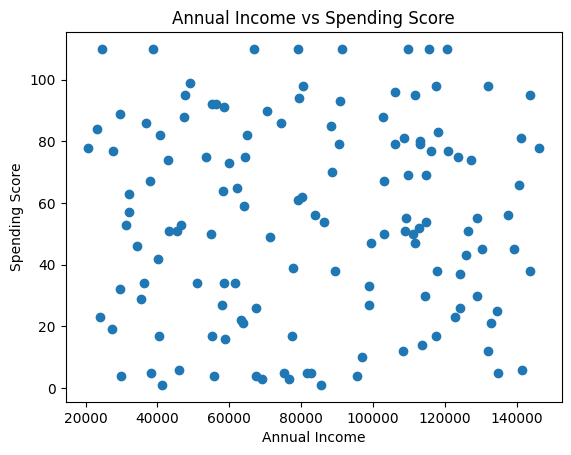

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Age distribution
df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for AnnualIncome to visualize outliers
plt.boxplot(df['AnnualIncome'])
plt.title('Boxplot for Annual Income')
plt.show()

# Scatter plot between AnnualIncome and SpendingScore
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Step 8: Export the Cleaned Dataset
Once the data has been cleaned and validated, export it to a new CSV file for further use or analysis.

In [ ]:
#Export the cleaned dataset to a new CSV file
df.to_csv('cleaned_ecommerce_data.csv', index=False)
print("Cleaned dataset exported to 'cleaned_ecommerce_data.csv'")

Cleaned dataset exported to 'cleaned_ecommerce_data.csv'


Step 9: Additional Testing - Validating Data Ranges
Validate the data ranges to ensure that values make sense within the context of the dataset. For instance:
The SpendingScore should be between 1 and 100. The AnnualIncome should not be negative.

In [ ]:
# Validate that SpendingScore is within the range 1 to 100
invalid_spending_scores = df[(df['SpendingScore'] < 1) | (df['SpendingScore'] > 100)]
print(f"Invalid SpendingScore entries:\n{invalid_spending_scores}")

# Handle invalid spending scores (e.g., capping values or removing rows)
df['SpendingScore'] = df['SpendingScore'].clip(1, 100)

# Check for negative AnnualIncome values
invalid_income = df[df['AnnualIncome'] < 0]
print(f"Invalid AnnualIncome entries:\n{invalid_income}")

# Handle invalid income values (e.g., remove rows or set to 0)
df['AnnualIncome'] = df['AnnualIncome'].apply(lambda x: max(x, 0))

Invalid SpendingScore entries:
     CustomerID        Age   Gender  AnnualIncome  SpendingScore
61           11  28.000000   Female      115435.0            110
66          111  28.000000   Female       38888.0            110
71           41  20.000000    Other       24611.0            110
97           81  31.000000    Other      120386.0            110
103          71  23.000000     Male      109643.0            110
108         141  54.000000    Other       66959.0            110
141         131  41.000000  Unknown       91180.0            110
149          21  41.173333    Other       79101.0            110
Invalid AnnualIncome entries:
Empty DataFrame
Columns: [CustomerID, Age, Gender, AnnualIncome, SpendingScore]
Index: []


<ipython-input-12-7d0ea214867f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SpendingScore'] = df['SpendingScore'].clip(1, 100)
<ipython-input-12-7d0ea214867f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnnualIncome'] = df['AnnualIncome'].apply(lambda x: max(x, 0))


Step 10: Advanced Analysis - Correlation Check
Check correlations between numerical columns to identify any interesting relationships.
This is useful for understanding which factors influence certain variables (like SpendingScore).

In [ ]:
#Select only the numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

#Display the correlation matrix
print("Correlation matrix : ", correlation_matrix)

Correlation matrix :                 CustomerID       Age  AnnualIncome  SpendingScore
CustomerID       1.000000  0.008901     -0.123846      -0.047840
Age              0.008901  1.000000     -0.061816       0.060613
AnnualIncome    -0.123846 -0.061816      1.000000       0.021237
SpendingScore   -0.047840  0.060613      0.021237       1.000000
